# Занятие 13. Кластерный анализ

Веберите любые данные для задачи кластеризации из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проведите кластерный анализ с использованием метода иерархической кластеризации и метода kNN. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 7/11/2021

## Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
matplotlib.style.use('ggplot')
%matplotlib inline

## Данные

*Источник:* https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data

*Название:* **Mall Customers Clustering Analysis**

### Описание данных

Данные из какого-то торгового центра.

### Описание полей

1. **CustomerID** — идентификатор покупателя;
1. **Gender** — пол покупателя;
1. **Age** — возраст;
1. **Annual Income (k$)** — годовой доход ;
1. **Spending Score** — потребительская способность;

Смотрим на данные.

In [2]:
df = pd.read_csv('./Mall_Customers.csv', index_col='CustomerID')

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Удаляем колонку `Gender`, потому что она не несёт дополнительной информации при кластеризации.

In [4]:
del df["Gender"]

Смотрим на описание данных.

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Иерархическая кластеризация

Построим дендрограмму, для того чтобы посмотреть сколько у нас имеется кластеров.

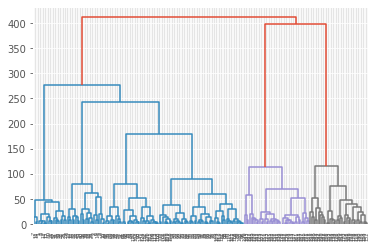

In [6]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link)

Алгоритм подкрасил в дендрограмме 3 кластера.

Посмотрим какими характеристиками различаются наши кластеры. Задаём критерий `maxclust` и количество кластеров равное 3.

In [7]:
df['cluster'] = fcluster(link, 3, criterion='maxclust')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера.

In [8]:
df.groupby('cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
1,39.968254,44.833333,49.460317
2,32.692308,86.538462,82.128205
3,41.685714,88.228571,17.285714


Отсюда можно сделать вывод, что наибольшей потребительской способностью обладают люди в возрасте 32-33 лет - это наиболее активная группа людей. Люди в возрасте 41 года хоть и имеют средства, но обладают более низкой потребительской способностью.

Также можно посмотреть, сколько наблюдений попало в каждый кластер.

In [9]:
df.groupby('cluster').size()

cluster
1    126
2     39
3     35
dtype: int64

Получается наибольшее количество покупателей торгового центра являются люди в возрасте 40 лет с потребительской способностью 49.

## Кластеризация методом k-means (k-средних)

У знаем сколько кластеров оптимально брать для рассмотрения и для этого построим график каменистой осыпи.

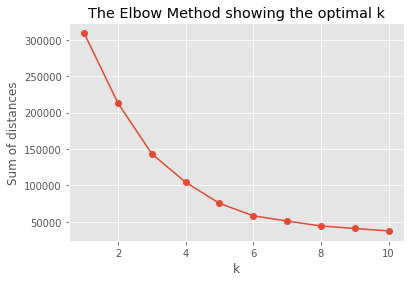

In [10]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Два кластера $-$ это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга.

In [11]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,46.165217,59.365217,32.886957
1,28.952941,62.176471,73.623529


Видно, что можно разделить покупателей на более активных и более пассивных. К активным покупателям можно отнести людей в среднем возраст которых равен 29, а к пассивным людей в среднем возраст которых равен 46.

In [12]:
df.groupby('cluster').size()

cluster
0    115
1     85
dtype: int64

Так же если посмотреть на количество записей в каждом кластере, то можно увидеть, что ненамного, но больше всё-таки пассивных покупателей, чем активных.